https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
import os
os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\Titanic')

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
print('train data:',train_data.shape)

train data: (891, 12)


In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.loc[train_data['Survived']==0,:].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Missing Data
From the entry totals above, there appears to be missing data. A heatmap will help better visualize what features as missing the most information.

In [18]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

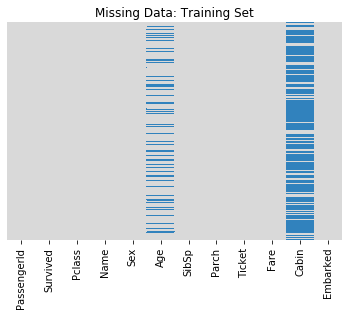

In [19]:
# Heatmap
sns.heatmap(train_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

The 'Age' variable is missing roughly 20% of its data. This proportion is likely small enough for reasonable replacements using some form of imputation as well (using the knowledge of the other columns to fill in reasonable values). However, too much data from the 'Cabin' column is missing to do anything useful with it at a basic level. This column may need to be dropped from the data set altogether or change to another feature such as 'Cabin Known: 1 or 0'.

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However, we can be smarter about this and check the average age by passenger class.

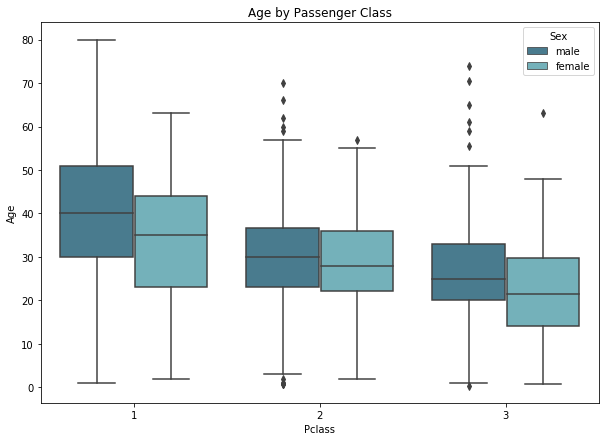

In [7]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age',hue='Sex', data = train_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

Naturally, the wealthier passengers in the higher classes tend to be older . We'll use these average age values to impute based on Pclass for Age.

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            
            return 29

        else:
            return 24

    else:
        return Age
    
# Apply the function to the Age column
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age, axis =1 )  

The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether.

In [24]:
# Remove Cabin feature
train_data.drop('Cabin', axis = 1, inplace = True)
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Since there is only one missing value in Embarked, that observation can just be removed.

In [30]:
# Remove rows with missing data
train_data.dropna(inplace = True)

Data Types
Next, I'll need to confirm that the variables are being assigned the correct data type to allow for easier analysis later on.

### Categorical Features

In [31]:
# Data types
print(train_data.info())

# Identify non-null objects
print('\n'*2)
print('Non-Null Objects to Be Converted to Category')
print(train_data.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None



Non-Null Objects to Be Converted to Category
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


Name and Ticket can be removed from the dataset as these features do not provide additional information about a passenger's liklihood of survival.

The remaining non-null objects, Sex and Embarked, will need to be specified as categories for better analysis results downstream.

In [32]:
# Remove unnecessary columns  
train_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    train_data[colname] = train_data[colname].astype('category')

In [33]:
train_data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

### Numeric Features

In [26]:
# Numeric summary
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.066409,13.244532,0.42,22.0000,26.0000,37.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


PassengerId can be removed from the dataset because it does not add any useful information in predicting a passenger's survival. The remaining variables are the correct data type.

In [22]:
# Remove PassengerId
train_data.drop('PassengerId', inplace = True, axis = 1)

### OBJECTIVE 1: EXPLORATORY DATA ANALYSIS

### Target Variable
'Survived' is our target as that is the dependent variable we are trying to predict.

Target Variable
Survived
0    549
1    342
Name: Survived, dtype: int64


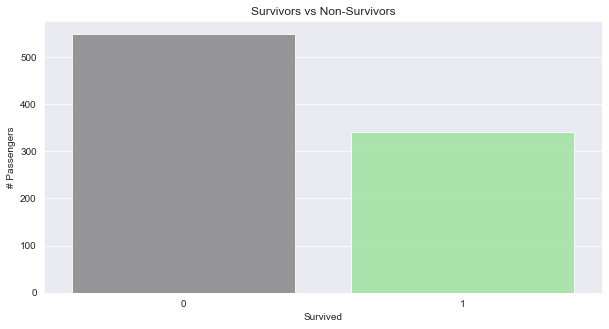

In [9]:
# Survival Count
print('Target Variable')
print(train_data.groupby(['Survived']).Survived.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(train_data['Survived'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Survivors vs Non-Survivors')
plt.ylabel('# Passengers')
plt.show()

### Target Variable Insight
The majority of passengers onboard did not survive.

### Numeric Features

In [11]:
# Identify numeric features
print('Continuous Variables')
print(train_data[['Age','Fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(train_data.groupby('Pclass').Pclass.count())
print(train_data.groupby('SibSp').SibSp.count())
print(train_data.groupby('Parch').Parch.count())

print(train_data['Pclass'].value_counts())

Continuous Variables
      count       mean        std   min      25%      50%   75%       max
Age   714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
Fare  891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [36]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (40,16))
fig.subplots_adjust(hspace = .30)

<Figure size 2880x1152 with 0 Axes>

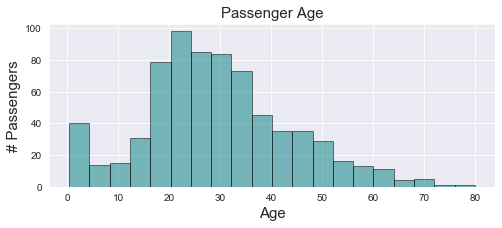

In [9]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (8,3))
fig.subplots_adjust(hspace = .60)
ax1 = fig.add_subplot()
ax1.hist(train_data['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Age', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Age',fontsize = 15)
plt.show()

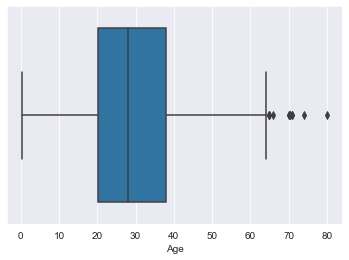

In [12]:
sns.boxplot(train_data['Age'])

Continuous Variables
      count       mean        std   min      25%      50%   75%       max
Age   714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
Fare  891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


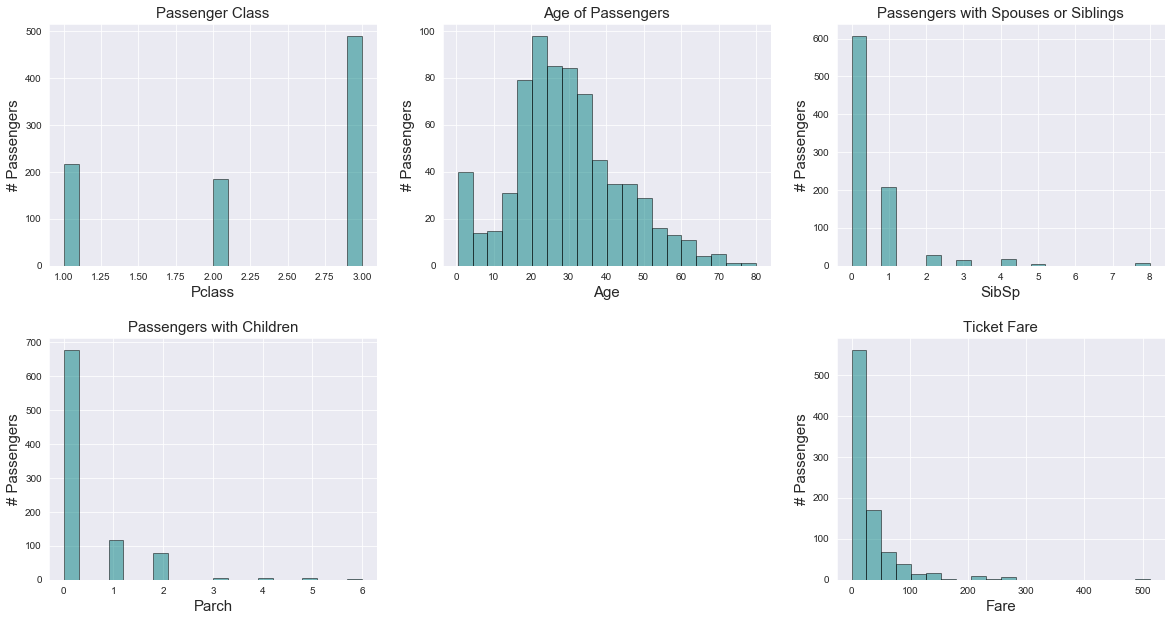

In [14]:
print('Continuous Variables')
print(train_data[['Age','Fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(train_data.groupby('Pclass').Pclass.count())
print(train_data.groupby('SibSp').SibSp.count())
print(train_data.groupby('Parch').Parch.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(331)
ax1.hist(train_data['Pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Pclass', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(332)
ax2.hist(train_data['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('Age of Passengers',fontsize = 15)

ax3 = fig.add_subplot(333)
ax3.hist(train_data['SibSp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('SibSp',fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

ax4 = fig.add_subplot(334)
ax4.hist(train_data['Parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Parch',fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Passengers with Children',fontsize = 15)

ax5 = fig.add_subplot(336)
ax5.hist(train_data['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Fare',fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Ticket Fare',fontsize = 15)


plt.show()


Numeric Features Insights

1) The majority of passengers aboard were third class
2) Most were single travelors with no spouses or children
3) Passenger age appears to be bi-modal, with a small peak around 5 years of age and a larger peak around 25 years old. This is an indication that the passenger age on board is distributed towards younger individuals with the median age being 26.
4) The bulk of fare prices are under $25 with a median fare of $14. However, the data is skewed to the right with outliers up to $500

### Target vs Numeric Features

Passenger Class Summary


Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


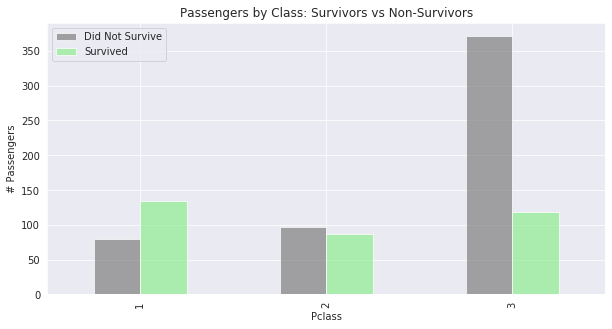

In [72]:
# Passenger class summary
print('Passenger Class Summary')

print('\n')
print(train_data.groupby(['Pclass','Survived']).Pclass.count().unstack())

# Passenger class visualization
pclass = train_data.groupby(['Pclass','Survived']).Pclass.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = False, 
                   title = 'Passengers by Class: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Pclass')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])
plt.show()

Passenger Class Insight

1) The majority of first-class passengers survived.
2) Most of the passengers in second and third class did not survive the sinking.

### Solo Passengers

In [74]:
train_data.groupby(['SibSp','Survived']).SibSp.count()

SibSp  Survived
0      0           398
       1           208
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: SibSp, dtype: int64

Passengers with Siblings or Spouse


Survived      0      1
SibSp                 
0         398.0  208.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


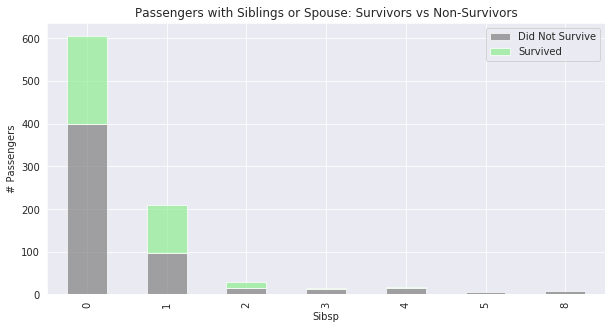

In [73]:
# SibSp Summary
print('Passengers with Siblings or Spouse')
print('\n')
print(train_data.groupby(['SibSp','Survived']).SibSp.count().unstack())

sibsp = train_data.groupby(['SibSp','Survived']).SibSp.count().unstack()

p2 = sibsp.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)

p2.set_title('Passengers with Siblings or Spouse: Survivors vs Non-Survivors')
p2.set_xlabel('Sibsp')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])
plt.show()

### Passengers with Children

Survived      0      1
Parch                 
0         445.0  231.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


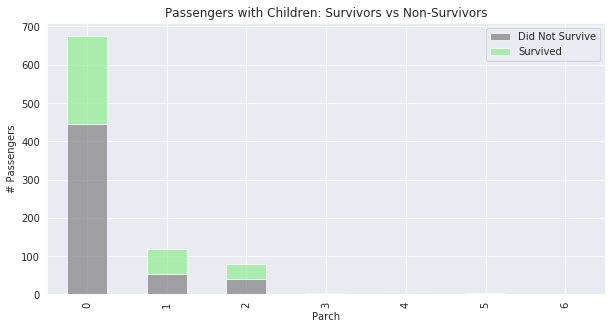

In [75]:
print(train_data.groupby(['Parch','Survived']).Parch.count().unstack())

parch = train_data.groupby(['Parch','Survived']).Parch.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p3.set_title('Passengers with Children: Survivors vs Non-Survivors')
p3.set_xlabel('Parch')
p3.set_ylabel('# Passengers')
p3.legend(['Did Not Survive','Survived'])
plt.show()

Passengers with Children Insight

1) The majority of passengers aboard did not have children
2) Most passengers without children did not survive.
3) Passengers with one or two children survived half of the time

### Ticket Fare and Age of Passengers

In [76]:
# titanic.hist(bins=10,figsize=(9,7),grid=False)
# Statistical summary of continuous variables 
print('Statistical Summary of Age and Fare')
print('\n')
print('Did Not Survive')
print(train_data[train_data['Survived']==0][['Age','Fare']].describe().transpose())
print('--'*40)
print('Survived')
print(train_data[train_data['Survived']==1][['Age','Fare']].describe().transpose())

Statistical Summary of Age and Fare


Did Not Survive
      count       mean        std  min      25%   50%   75%    max
Age   549.0  29.560109  12.778433  1.0  23.0000  25.0  37.0   74.0
Fare  549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0
--------------------------------------------------------------------------------
Survived
      count       mean        std   min       25%   50%      75%       max
Age   340.0  28.146088  13.852728  0.42  21.00000  27.0  36.0000   80.0000
Fare  340.0  48.209498  66.748773  0.00  12.44375  26.0  56.9469  512.3292


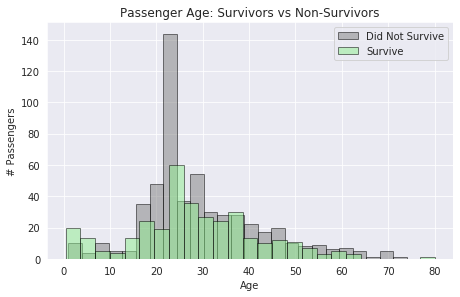

In [77]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(train_data[train_data['Survived'] ==0].Age, bins = 25, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(train_data[train_data['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')

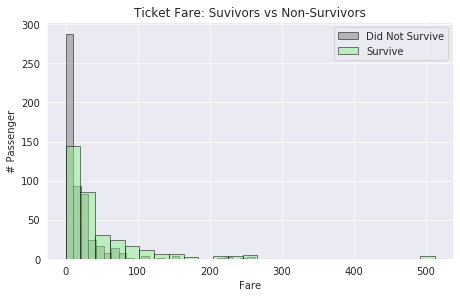

In [80]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax2 = fig.add_subplot(221)
ax2.hist(train_data[train_data['Survived']==0].Fare, bins = 25, label = 'Did Not Survive', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(train_data[train_data['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax2.set_title('Ticket Fare: Suvivors vs Non-Survivors')
ax2.set_xlabel('Fare')
ax2.set_ylabel('# Passenger')
ax2.legend(loc = 'upper right')


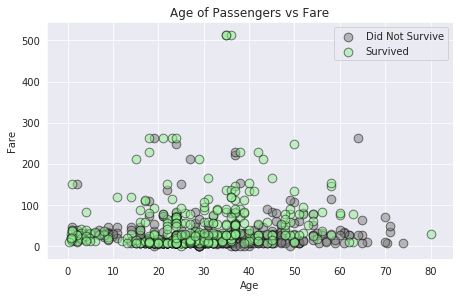

In [82]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax3 = fig.add_subplot(221)
ax3.scatter(x = train_data[train_data['Survived']==0].Age, y = train_data[train_data['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = train_data[train_data['Survived']==1].Age, y = train_data[train_data['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()

Statistical Summary of Age and Fare


Did Not Survive
      count       mean        std  min      25%   50%   75%    max
Age   549.0  29.560109  12.778433  1.0  23.0000  25.0  37.0   74.0
Fare  549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0
--------------------------------------------------------------------------------
Survived
      count       mean        std   min       25%   50%      75%       max
Age   340.0  28.146088  13.852728  0.42  21.00000  27.0  36.0000   80.0000
Fare  340.0  48.209498  66.748773  0.00  12.44375  26.0  56.9469  512.3292


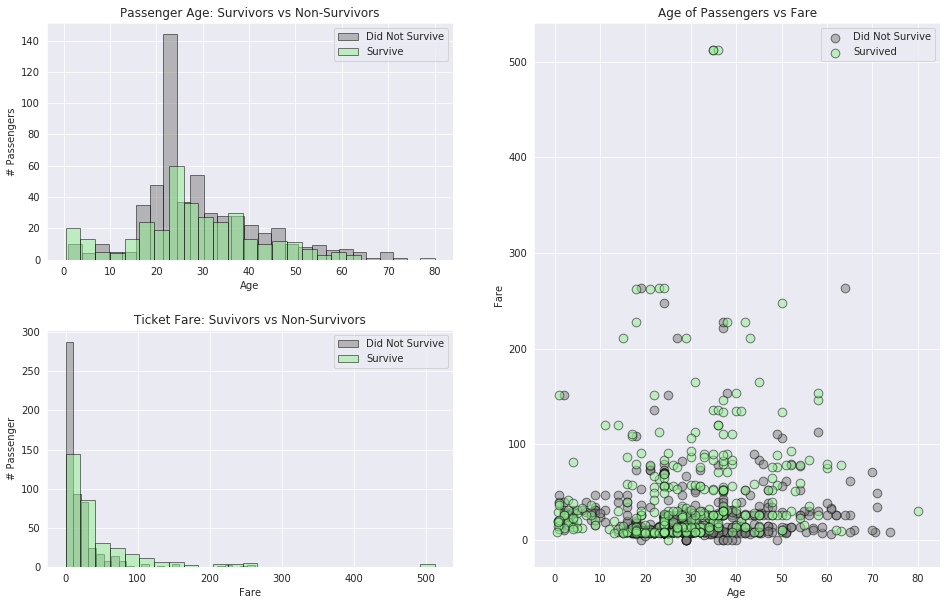

In [84]:
# titanic.hist(bins=10,figsize=(9,7),grid=False)
# Statistical summary of continuous variables 
print('Statistical Summary of Age and Fare')
print('\n')
print('Did Not Survive')
print(train_data[train_data['Survived']==0][['Age','Fare']].describe().transpose())
print('--'*40)
print('Survived')
print(train_data[train_data['Survived']==1][['Age','Fare']].describe().transpose())
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(train_data[train_data['Survived'] ==0].Age, bins = 25, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(train_data[train_data['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(train_data[train_data['Survived']==0].Fare, bins = 25, label = 'Did Not Survive', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(train_data[train_data['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax2.set_title('Ticket Fare: Suvivors vs Non-Survivors')
ax2.set_xlabel('Fare')
ax2.set_ylabel('# Passenger')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.scatter(x = train_data[train_data['Survived']==0].Age, y = train_data[train_data['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = train_data[train_data['Survived']==1].Age, y = train_data[train_data['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()

plt.show()

Numeric Features Insight

1) The majority of passengers under 10 years of age survived.
2) Most people that paid over $100 for their ticket survived.
3) There were a fewer number of people that survived over the age of 40.

### Categorical Feature

In [85]:
# Identify categorical features
train_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

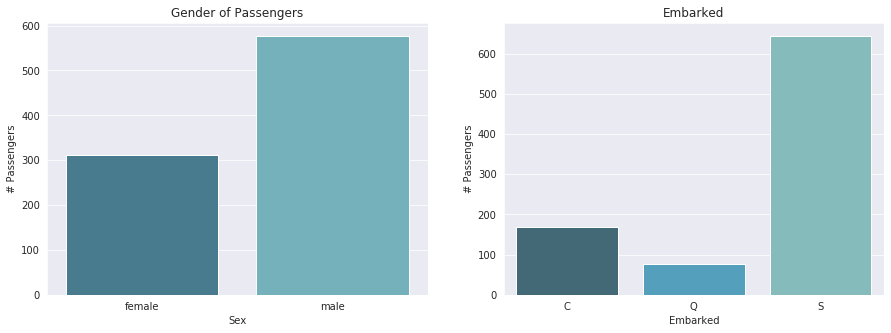

In [88]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (15,5))

# Plot [0]
sns.countplot(x = 'Sex', data = train_data, palette = 'GnBu_d', ax = axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('# Passengers')
axes[0].set_title('Gender of Passengers')

# Plot [1]
sns.countplot(x = 'Embarked', data = train_data, palette = 'GnBu_d',ax = axes[1])
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('# Passengers')
axes[1].set_title('Embarked')

plt.show()

Categorical Features Insight

1) Passengers were primarily male
2) Most passengers embarked from Southhampton

### Target vs Categorical Features

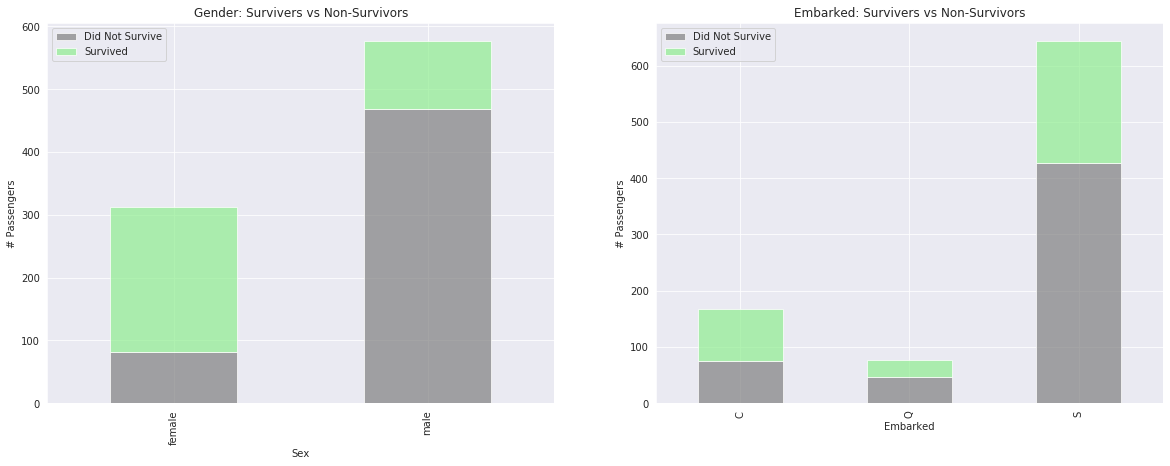

In [89]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))

gender = train_data.groupby(['Sex','Survived']).Sex.count().unstack()
p1 = gender.plot(kind = 'bar', stacked = True, 
                   title = 'Gender: Survivers vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70, ax = axes[0])
p1.set_xlabel('Sex')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])


embarked = train_data.groupby(['Embarked','Survived']).Embarked.count().unstack()
p2 = embarked.plot(kind = 'bar', stacked = True, 
                    title = 'Embarked: Survivers vs Non-Survivors', 
                    color = ['grey','lightgreen'], alpha = .70, ax = axes[1])
p2.set_xlabel('Embarked')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])

plt.show()

https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end